# Self-Driving Car Engineer Nanodegree

* **Project: Advanced Lane Line** 

* **Author:   Matt Kontz**

* **Start date:  January 29, 2019**



# Import Packages
Import package to be use throughout project notebook

In [1]:
#importing some useful packages
import os

import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

# Camera Calibration

## Create list of Calibration Image Files

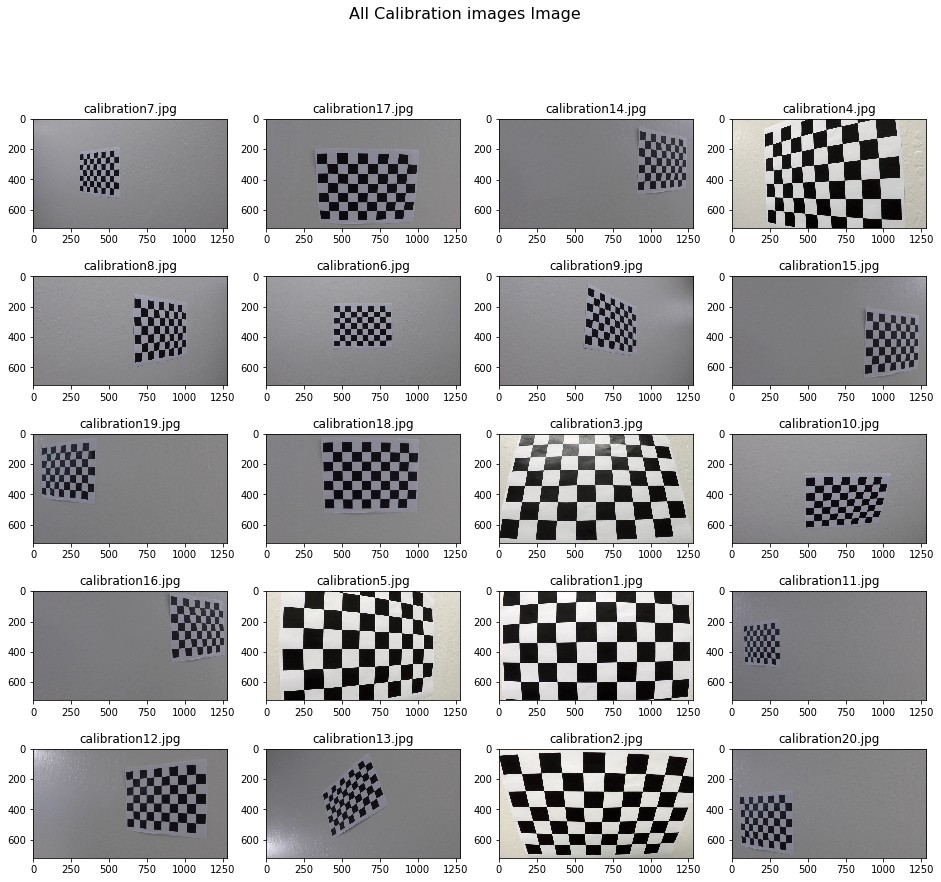

In [2]:
# Find calibration image names 
calImageNames = os.listdir("camera_cal/")

nRow = 5
nCol = 4

fig, ax = plt.subplots(nRow, nCol, figsize=(16, 14))
fig.suptitle("All Calibration images Image", fontsize=16)

for r in range(nRow):    
    for c in range(nCol):
        k = r * nCol + c
        if (k < len(calImageNames)):
            image = mpimg.imread("./camera_cal/" + calImageNames[k])
            ax[r,c].imshow(image)
            ax[r,c].set_title(calImageNames[k])

fig.savefig('output_images/cal_images.png')


## Create List of Image and Object Points for Camera Calibration

* Create empty lists for object and image points
* Create object points once as this will be the same for all images
* Iterate through calibration images
    * load image
    * convert to grey scale
    * find corners (i.e. image points) using findChessboardCorners
    * if success append image and object points to list

Finding image points
    Added:  calibration7.jpg
    Added:  calibration17.jpg
    Added:  calibration14.jpg
    Failed: calibration4.jpg
    Added:  calibration8.jpg
    Added:  calibration6.jpg
    Added:  calibration9.jpg
    Added:  calibration15.jpg
    Added:  calibration19.jpg
    Added:  calibration18.jpg
    Added:  calibration3.jpg
    Added:  calibration10.jpg
    Added:  calibration16.jpg
    Failed: calibration5.jpg
    Failed: calibration1.jpg
    Added:  calibration11.jpg
    Added:  calibration12.jpg
    Added:  calibration13.jpg
    Added:  calibration2.jpg
    Added:  calibration20.jpg


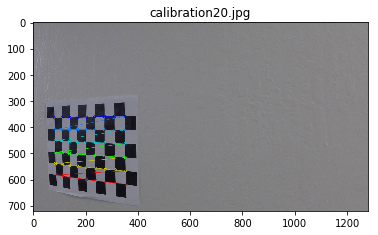

In [3]:
imgpoints = []
objpoints = []

objpnt = np.zeros((6*9,3), np.float32)
objpnt[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

print('Finding image points')
for fname in calImageNames:
    # load a calibration image
    raw_img = mpimg.imread("./camera_cal/" + fname)
    raw_plot = plt.imshow(raw_img)

    # convert to gray scale image
    gray = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
    #gray_plot = plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    if ret:
        # if points are found then append to list of image and object points
        imgpoints.append(corners)
        objpoints.append(objpnt)
        print('    Added:  ' + fname)
    else:
        print('    Failed: ' + fname)
        
    # plot corners on chess board
    corner_lines_img = cv2.drawChessboardCorners(raw_img, (9, 6), corners, ret)
    plt.imshow (corner_lines_img)
    plt.title(fname)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


# Distortion Correction

The camera calibration calculated five parameters
 
* ret - (return value) boolean that indicates success
* mtx - (camera matrix) 
    * focal length = ( f<sub>x</sub> f<sub>y</sub> )
    * optical centers = ( c<sub>x</sub> c<sub>y</sub> )
\begin{equation*}
    mtx = \left( 
        \begin{matrix}
        f_x & 0 & c _x\\
        0 & f_y & c_y \\
        0 & 0 & 1 \\
    \end{matrix} \right)
\end{equation*}

* dist - (distortion coefficients)
\begin{equation*} 
    dist = \left[ k_1 k_2 p_1 p_2 k_3 \right] 
\end{equation*}
* rvecs - (rotation vectors) 
* tvecs - (translation vectors)

The two calibration parameters required for removing distortion are the camera martix (mtx) and distortion coefficients (dist).  These two parameters along with image are fed into cv2.undistort.  See sample below.


## Verify Calibration on Sample Image

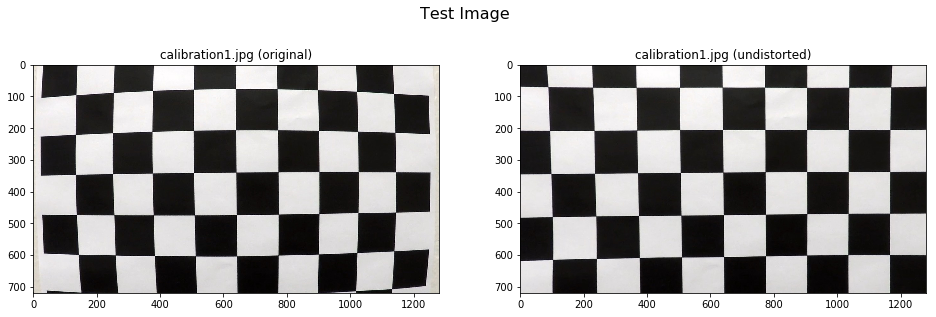

In [4]:
# load and plot Sample image
fname = 'calibration1.jpg'
sample_img = mpimg.imread("./camera_cal/" + fname)

dst = cv2.undistort(sample_img, mtx, dist, None, mtx)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Test Image", fontsize=16)

ax[0].imshow(sample_img)
ax[0].set_title(fname + ' (original)')
    
ax[1].imshow(dst)
ax[1].set_title(fname + ' (undistorted)')

fig.savefig('output_images/undistorted_chessboard.png')


# Color/Gradient Threshold

In [ ]:
# Find calibration image names 
calImageNames = os.listdir("camera_cal/")

In [ ]:
for k in range(6):
    raw_img = mpimg.imread("./test_images/test" + str(k))
    
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Test Image", fontsize=16)

    ax[0].imshow(sample_img)
    ax[0].set_title(fname + ' (original)')

    ax[1].imshow(dst)
    ax[1].set_title(fname + ' (undistorted)')

    fig.savefig('output_images/undistorted_chessboard.png')

# Perspective Transform

# Detect Lane Lines

# Determine the Lane Curvature

# Play Video